In [1]:
#Print all the variables, not only the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [82]:
import numpy as np
import pandas as pd
import sympy as sy  # 数字与字母符号作为变量
import scipy as sp  # 科学计算矩阵
import scipy.linalg
import matplotlib.pyplot as plt  #导入集成的pyplot
%matplotlib inline

In [3]:
np.set_printoptions(precision=4) # 设置之后显示的精确度

In [22]:
# Create matrix
A = pd.DataFrame([[1,2,4],[3,4,5],[5,6,7]])
A
B = np.round(10*np.random.randn(3,3),2)
B

# Create by sympy library
M = sy.randMatrix(3,4, percent = 80)  # generate a random matrix with 80% of entries being nonzero
M

,0,1,2
0,1,2,4
1,3,4,5
2,5,6,7


array([[-10.38,   6.99,   9.34],
       [ -9.61,  -4.3 ,  17.04],
       [ -3.43,  -4.12,   6.41]])

Matrix([
[ 0, 51, 79, 41],
[ 0,  7, 95, 21],
[71, 50, 61, 32]])

### Basic operation

In [5]:
# 行列式 Determinant
np.linalg.det(A)   # 若det=0，则矩阵不可逆 not invertible

-1.9999999999999958

In [6]:
# + - * / % **
A.add(B)
A.sub(B)
A.mul(B) # Elementwise product
A.div(B)
A.mod(B)
A.pow(B)

,0,1,2
0,2.57,9.91,11.13
1,-18.13,8.21,-5.67
2,24.04,5.61,22.14


,0,1,2
0,-0.57,-5.91,-3.13
1,24.13,-0.21,15.67
2,-14.04,6.39,-8.14


,0,1,2
0,1.57,15.82,28.52
1,-63.39,16.84,-53.35
2,95.20,-2.34,105.98


,0,1,2
0,0.636943,0.252845,0.561010
1,-0.141978,0.950119,-0.468604
2,0.262605,-15.384615,0.462351


,0,1,2
0,1.00,2.00,4.00
1,-18.13,4.00,-5.67
2,5.00,-0.24,7.00


,0,1,2
0,1.000000e+00,240.517824,1.961949e+04
1,8.287583e-11,342.509454,3.483293e-08
2,2.034178e+13,0.497188,6.234252e+12


In [9]:
# Matrix product 点乘
A.dot(B)
A@B

,0,1,2
0,35.47,14.77,46.35
1,15.39,38.62,54.41
2,14.35,62.08,77.61


,0,1,2
0,35.47,14.77,46.35
1,15.39,38.62,54.41
2,14.35,62.08,77.61


In [10]:
# Transposition
A.T
A.transpose()

,0,1,2
0,1,3,5
1,2,4,6
2,4,5,7


,0,1,2
0,1,3,5
1,2,4,6
2,4,5,7


In [11]:
# stack the matrix A and B horizontally
A_B = np.hstack((A, B)) 
A_B

array([[  1.  ,   2.  ,   4.  ,   1.57,   7.91,   7.13],
       [  3.  ,   4.  ,   5.  , -21.13,   4.21, -10.67],
       [  5.  ,   6.  ,   7.  ,  19.04,  -0.39,  15.14]])

In [12]:
# Switch two Columns rows of a matrix
A
E = pd.DataFrame([[0, 1, 0], [1, 0, 0], [0, 0, 1]])
A@E; E@A

,0,1,2
0,1,2,4
1,3,4,5
2,5,6,7


,0,1,2
0,2,1,4
1,4,3,5
2,6,5,7


,0,1,2
0,3,4,5
1,1,2,4
2,5,6,7


In [26]:
# 取对角向量
A_diag = np.diag(A)
A_diag

array([1, 4, 7])

### Special Matrix

In [13]:
# Identity matrix 单元矩阵
I = np.eye(3)
I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [55]:
# 零矩阵
O = sy.zeros(3,3).tolist()
O

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

In [15]:
# Inverse matrix 求逆矩阵
Ainv = np.linalg.inv(A)
Ainv

np.round(A.dot(Ainv))  # A*(A^-1)=I, round保留精确度，0.0其实是无限小的数值

array([[ 1. , -5. ,  3. ],
       [-2. ,  6.5, -3.5],
       [ 1. , -2. ,  1. ]])

,0,1,2
0,1.0,0.0,-0.0
1,-0.0,1.0,-0.0
2,-0.0,0.0,1.0


In [21]:
# trianglization 矩阵三角化
A
A_triu = np.triu(A);A_triu
A_tril = np.tril(A);A_tril

,0,1,2
0,1,2,4
1,3,4,5
2,5,6,7


array([[1, 2, 4],
       [0, 4, 5],
       [0, 0, 7]])

array([[1, 0, 0],
       [3, 4, 0],
       [5, 6, 7]])

In [50]:
# 求矩阵的最简行阶梯型  只能用scipy的matrix
C = sy.Matrix([[1,2,1,4],[2,1,-1,5],[-1,-1,-1,-2],[1,1,-4,7]])
C_inv=C.rref()[0]
C_inv
# 使用C_inv.tolist()转化为可计算的array

Matrix([
[1, 0, 0,  1],
[0, 1, 0,  2],
[0, 0, 1, -1],
[0, 0, 0,  0]])

### Matrix Decomposition

#### 1. 特征值与特征向量
特征向量在经过与A矩阵相乘这个变换操作后得到的新向量方向与特征向量相同。 矩阵只起到了拉伸的作用，相当于向量乘了个参数。

应用： 图像处理中的PCA方法，选取特征值最高的k个特征向量来表示一个矩阵，从而达到降维分析+特征显示的方法，还有图像压缩的K-L变换。再比如很多人脸识别，数据流模式挖掘分析等方面。

In [73]:
A = sy.Matrix([[1, 0, 0], [1, 0, 1], [2, -2, 3]]); A
A = np.array(A).astype(float)

eigvals,eigvec=np.linalg.eig(A)
eigvals
eigvec

Matrix([
[1,  0, 0],
[1,  0, 1],
[2, -2, 3]])

array([2., 1., 1.])

array([[ 0.    ,  0.    ,  0.4082],
       [ 0.4472,  0.7071, -0.4082],
       [ 0.8944,  0.7071, -0.8165]])

#### 2. 矩阵对角化（特征值分解）

D是对角矩阵，对角的元素对应着A的特征值们。<br>
条件：P可逆，A是方阵


当A为实对称矩阵时，A可分解为其中Q由A的正交特征向量组成，Q的特征值均为实数。

In [79]:
A = sy.Matrix([[1, 0, 0], [1, 0, 1], [2, -2, 3]])
P, D = A.diagonalize()
P
D

Matrix([
[1, -1, 0],
[1,  0, 1],
[0,  1, 2]])

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 2]])

#### 3. SVD分解(Singular Value Decomposition)
本质：对非方阵的矩阵进行“对角化”，是一种广义的特征值分解。
M是一个m×n阶矩阵，存在一个分解使得其中U是m×m矩阵，Σ是m×n阶非负实数对角矩阵,对角线上的元素是M的奇异值，V*即V的共轭转置，是n×n阶酉矩阵。

从矩阵分解的角度理解SVD：把复杂的M矩阵变换分解为3个连续的变换
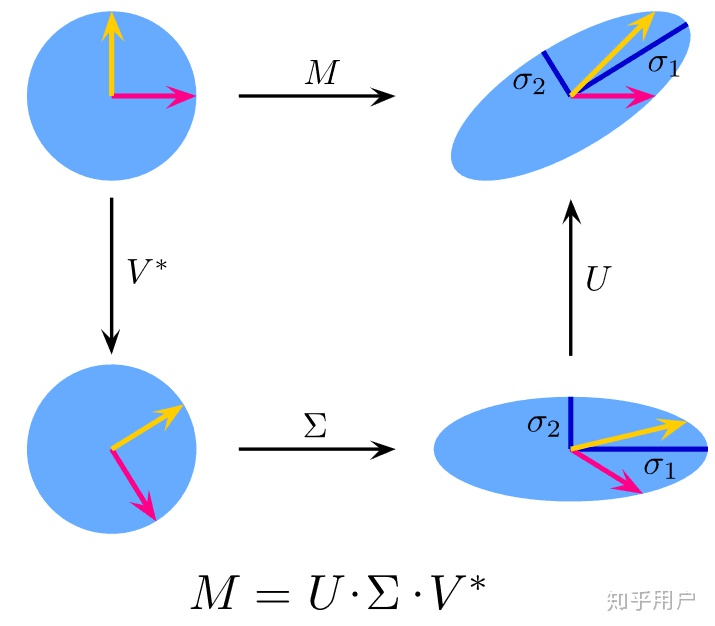


应用：数据压缩、去噪

(676, 676) (676,) (1202, 1202)


(<matplotlib.image.AxesImage at 0x627513240>, (-0.5, 1201.5, 675.5, -0.5))

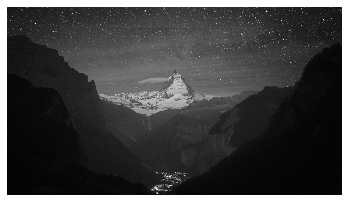

In [85]:
import cv2
 
# 灰度化读取图片
img = cv2.imread('SVD_test.jpg', 0)
 
# 得到svd
U, S, V = np.linalg.svd(img)
 
# 得到矩阵的形状
print(U.shape, S.shape, V.shape)

comp=400  # 选取前400个特征向量

low_rank = U[:, :comp] @ np.diag(S[:comp]) @ V[:comp, :]  # 降维后的矩阵
plt.imshow(low_rank, cmap = 'gray'), plt.axis('off')

<Figure size 1152x576 with 0 Axes>

(<matplotlib.axes._subplots.AxesSubplot at 0x62ac324e0>,
 (-0.5, 1201.5, 675.5, -0.5),
 Text(0.5, 1.0, 'Original Image with n_components =638'))

(<matplotlib.axes._subplots.AxesSubplot at 0x62752eb38>,
 (-0.5, 1201.5, 675.5, -0.5),
 Text(0.5, 1.0, 'n_components =500'))

(<matplotlib.axes._subplots.AxesSubplot at 0x6294eac88>,
 (-0.5, 1201.5, 675.5, -0.5),
 Text(0.5, 1.0, 'n_components =400'))

(<matplotlib.axes._subplots.AxesSubplot at 0x629cc9550>,
 (-0.5, 1201.5, 675.5, -0.5),
 Text(0.5, 1.0, 'n_components =300'))

(<matplotlib.axes._subplots.AxesSubplot at 0x629cfbdd8>,
 (-0.5, 1201.5, 675.5, -0.5),
 Text(0.5, 1.0, 'n_components =200'))

(<matplotlib.axes._subplots.AxesSubplot at 0x629d366a0>,
 (-0.5, 1201.5, 675.5, -0.5),
 Text(0.5, 1.0, 'n_components =100'))

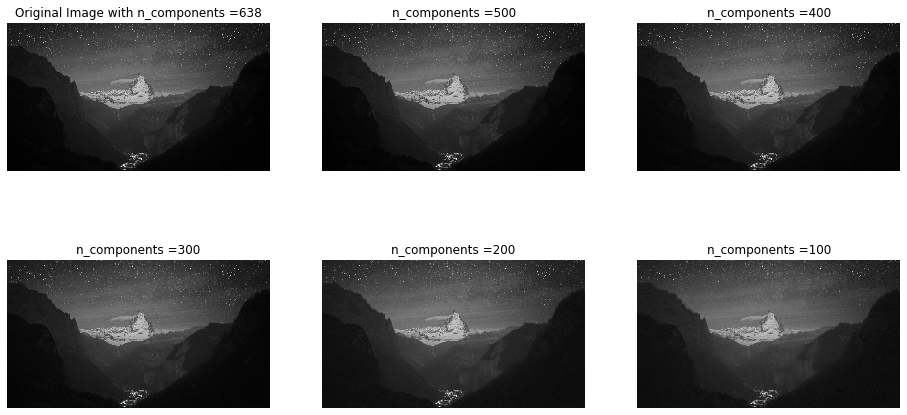

In [86]:
 
# 以不同component数绘制图像
comps = [638, 500, 400, 300, 200, 100]
 
plt.figure(figsize = (16, 8))

for i in range(6):
  low_rank = U[:, :comps[i]] @ np.diag(S[:comps[i]]) @ V[:comps[i], :]
  if(i  == 0):
     plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("Original Image with n_components =" + str(comps[i]))
  else:
     plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("n_components =" + str(comps[i]))


#### 4. LU分解：将矩阵分成一个上三角，一个下三角，用于高效简化方程求解过程
Ax= (LU)x = L(Ux) = b。令Ux = y，则原线性方程组Ax = b可首先求解向量y 使Ly = b，然后求解 Ux = y，从而达到求解线性方程组Ax= b的目的。

  Replace $A$ in the system, we have $L(Ux) = b$, solve this pair of equations

（1）解方程Ly=b，得到 y

（2）再通过Ux=y，得到 x

In [31]:
P, L, U = sp.linalg.lu(A)  # P@L@U=A
P;L;U

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

array([[1. , 0. , 0. ],
       [0.2, 1. , 0. ],
       [0.6, 0.5, 1. ]])

array([[ 5. ,  6. ,  7. ],
       [ 0. ,  0.8,  2.6],
       [ 0. ,  0. , -0.5]])

#### 5. Cholesky 分解
Cholesky 分解是把一个对称正定的矩阵表示成一个下三角矩阵L和其转置的乘积的分解。它要求矩阵的所有特征值必须大于零，故分解的下三角的对角元也是大于零的。


In [76]:
A = np.array([[16, -8, -4], [-8, 29, 12], [-4, 12, 41]]); A
L = sp.linalg.cholesky(A, lower = True)
L

array([[16, -8, -4],
       [-8, 29, 12],
       [-4, 12, 41]])

array([[ 4.,  0.,  0.],
       [-2.,  5.,  0.],
       [-1.,  2.,  6.]])

#### 6. QR分解
矩阵的QR分解是指，可以将矩阵A分级成一个正交阵Q和一个上三角矩阵R的乘积。实际中，QR分解经常被用来解线性最小二乘问题
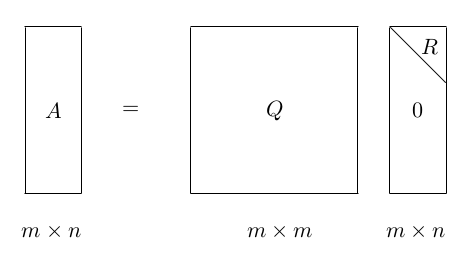

In [78]:
Q, R = np.linalg.qr(A)
Q
R

array([[-4.0825e-01, -5.7735e-01, -7.0711e-01],
       [-4.0825e-01, -5.7735e-01,  7.0711e-01],
       [-8.1650e-01,  5.7735e-01,  1.0392e-16]])

array([[-2.4495,  1.633 , -2.8577],
       [ 0.    , -1.1547,  1.1547],
       [ 0.    ,  0.    ,  0.7071]])

### Problem Solving

#### 1. Solving equations: Find the lambda that make matrix invertible

In [67]:
lamb = sy.symbols('lamda') # SymPy will automatically render into LaTeX greek letters
A = np.array([[3, lamb, 1], [2, -1, 6], [1, 9, 4]])
I = np.eye(3)
AI = np.hstack((A, I))
AI = sy.Matrix(AI)
AI
AI_rref = AI.rref()
AI_rref

Matrix([
[3, lamda, 1, 1.0, 0.0, 0.0],
[2,    -1, 6, 0.0, 1.0, 0.0],
[1,     9, 4, 0.0, 0.0, 1.0]])

(Matrix([
 [1, 0, 0, (1044.0*lamda + 1566.0)/((-6*lamda - 465)*(-6*lamda - 9)), (-3.0*lamda*(-6*lamda - 465) - (-18*lamda - 3)*(3.0*lamda - 81.0))/((-6*lamda - 465)*(-6*lamda - 9)), -(-18*lamda - 3)*(-6.0*lamda - 9.0)/((-6*lamda - 465)*(-6*lamda - 9))],
 [0, 1, 0,     (12.0*lamda + 18.0)/((-6*lamda - 465)*(-2*lamda - 3)),                                               (-66.0*lamda - 99.0)/((-6*lamda - 465)*(-2*lamda - 3)),                (96.0*lamda + 144.0)/((-6*lamda - 465)*(-2*lamda - 3))],
 [0, 0, 1,                                     57.0/(-6*lamda - 465),                                                                  (3.0*lamda - 81.0)/(-6*lamda - 465),                                   (-6.0*lamda - 9.0)/(-6*lamda - 465)]]),
 (0, 1, 2))

In [66]:
# To make the matrix invertible we notice that (-6*lamda-465)!=0 must be satisifed
sy.solvers.solve(-6*lamb-465, lamb)

[-155/2]

In [ ]:
lamb = sy.symbols('lamda') # SymPy will automatically render into LaTeX greek letters

sy.solvers.solve(-6*lamb**2-465, lamb)

#### 2. 解Ax=b

In [32]:

A = np.round(10 * np.random.rand(5, 5))
b = np.round(10 * np.random.rand(5,))
A
b

array([[ 7.,  3.,  2.,  1.,  4.],
       [ 6.,  2.,  6.,  2.,  9.],
       [ 8.,  9.,  8.,  2.,  8.],
       [10.,  1.,  7.,  3.,  6.],
       [ 6.,  9.,  9.,  1.,  4.]])

array([ 2., 10.,  0.,  8.,  3.])

In [ ]:
x = np.linalg.solve(A, b);x

#### 3. 交叉相乘和因式分解

In [68]:
lamda = sy.symbols('lamda')
A = sy.Matrix([[1,6],[5,2]])
I = sy.eye(2)

A - lamda*I
p = A.charpoly(lamda);p
sy.factor(p)

Matrix([
[1 - lamda,         6],
[        5, 2 - lamda]])

PurePoly(lamda**2 - 3*lamda - 28, lamda, domain='ZZ')

(lamda - 7)*(lamda + 4)